# Online Retail Lab

## Dataset

Repositorio de aprendizaje automático de UC Irvine

- [online retail](https://archive.ics.uci.edu/dataset/352/online+retail)

## Contexto

Este es un conjunto de datos transaccional que contiene todas las transacciones que tuvieron lugar entre el 12/01/2010 y el 12/09/2011 para un comercio minorista en línea sin tienda registrado y con sede en el Reino Unido. La empresa vende principalmente regalos únicos para todas las ocasiones. Muchos clientes de la empresa son mayoristas.

## Objetivo

Determinar las ventas a traves en el tiempo.
Poder saber cuanto se vende de acuerdo a:

- Dia de la semana
- dia de la semana y hora del dia 
- mes del año.

## Requirements

execute the following command to install the required packages:

```bash
pip install -r requirements.txt
```

## Extracción de Datos

In [2]:
import pandas
data = pandas.read_excel('OnlineRetail.xlsx')
# Muestra las primeras filas del DataFrame
print(data.head())
# Obtiene el número de filas y columnas en el DataFrame
filas, columnas = data.shape
print(f'Número de filas: {filas}, Número de columnas: {columnas}')

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
Número de filas: 541909, Número de columnas: 8


## Preparación y transformación de datos

### Limpieza de los datos

- Se eliminan las filas donde las columnas Quantity y/o UnitPrice tienen valores negativos.
- Se eliminan las filas donde las columnas Quantity y/o UnitPrice tienen valores outliers.
- Se eliminan los datos que no corresponden a las ventas en el Reino Unido.t

### Agregado de columnas

- Se agrega la columna Date con formato fecha a partir de la columna InvoiceDate.
- Se agregar la columna Total con el valor de la multiplicación de las columnas Quantity y UnitPrice.

In [3]:
# Limpieza de los datos
sanitized = data.loc[data['Quantity'] > 0 , :]
sanitized = sanitized.loc[sanitized['UnitPrice'] > 0 , :]
sanitized = sanitized.loc[sanitized['UnitPrice'] < 200, :]
sanitized = sanitized.loc[sanitized['Country'] == 'United Kingdom', :]

# Agregado de columnas
sanitized['Date'] = pandas.to_datetime(sanitized['InvoiceDate'])
sanitized['Total'] = sanitized['Quantity'] * sanitized['UnitPrice']
sanitized = sanitized.loc[sanitized['Total'] > 0, :]
sanitized = sanitized.loc[sanitized['Total'] < 5000, :]

# elimino columnas que no me interesan
sanitized = sanitized.drop(['StockCode', 'Description', 'Country', 'InvoiceDate'], axis=1)

## Exploración y visualización de datos

- Se crea una función para visualizar una columna en particular. La cual se utiliza para ver la distribución de los datos.
- Se verifica que los datos están limpios.

### visualización

- Se obtiene el monto total por ventas en dia de la semana.
- Se obtiene el monto total por ventas por hora del dia.
- Se obtiene el monto total por ventas por dia de la semana y hora del dia.
- Se obtiene la cantidad de ventas por mes del año.

In [4]:
import matplotlib.pyplot as plt

def plot_hist_box(data, column):
    """Plot histogram and boxplot"""
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))
    # Histograma
    data[column].hist(bins=50, edgecolor='black', ax=axes[0])  # Aumenta el número de bins
    axes[0].set_yscale('log')  # Escala logarítmica en el eje y
    axes[0].set_title(f'{column} Column Histogram')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequency')
    axes[1].set_yscale('log') 

    # Diagrama de caja
    data.boxplot(column=column, ax=axes[1])
    axes[1].set_title(f'{column} Column Box Plot')
    axes[1].set_ylabel(column) 

    plt.tight_layout()
    plt.show()

            Quantity      UnitPrice     CustomerID  \
count  484768.000000  484768.000000  354276.000000   
mean        9.280998       3.397971   15552.541459   
min         1.000000       0.001000   12747.000000   
25%         1.000000       1.250000   14194.000000   
50%         3.000000       2.100000   15522.000000   
75%        10.000000       4.130000   16931.000000   
max      4800.000000     199.890000   18287.000000   
std        36.052280       5.692737    1594.525127   

                                Date          Total  
count                         484768  484768.000000  
mean   2011-07-04 12:53:35.385504512      17.535598  
min              2010-12-01 08:26:00       0.001000  
25%              2011-03-27 13:56:00       3.360000  
50%              2011-07-19 15:38:00       8.420000  
75%              2011-10-20 13:07:00      16.950000  
max              2011-12-09 12:49:00    4921.500000  
std                              NaN      61.568872  


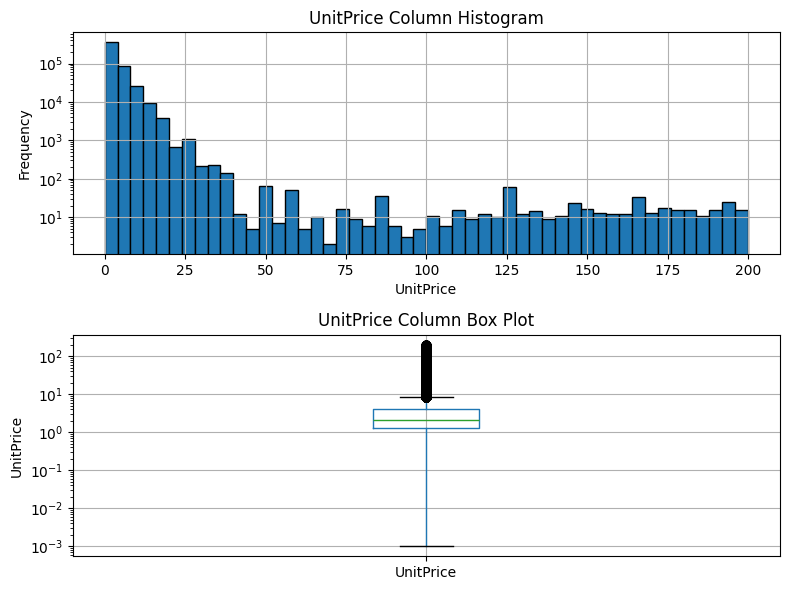

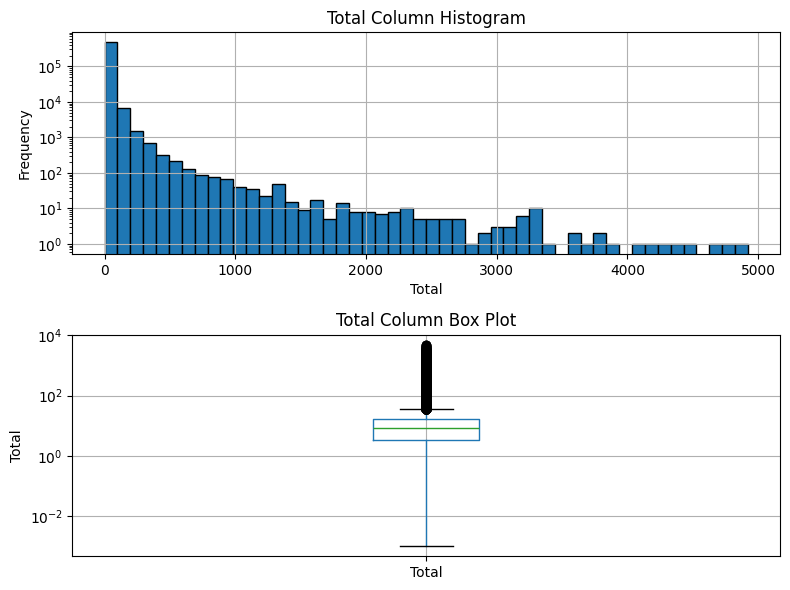

In [5]:
print(sanitized.describe())
plot_hist_box(sanitized, 'UnitPrice')
plot_hist_box(sanitized, 'Total')

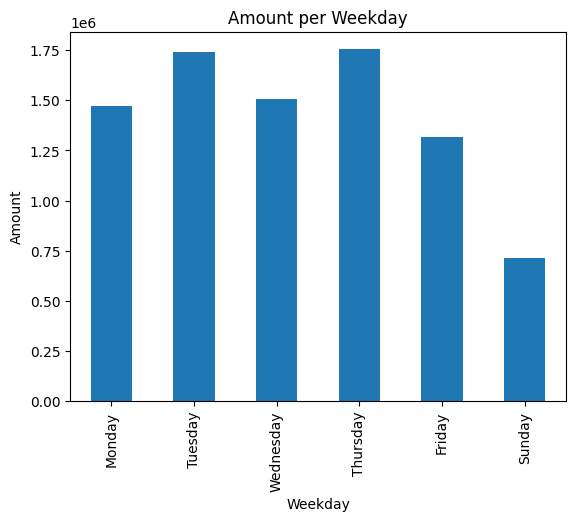

In [6]:

# Group by day of the week and calculate the sum of the total
result = sanitized.groupby(sanitized['Date'].dt.day_name()).agg({'Total': 'sum'}).reset_index()
# Defines the desired order of the days of the week
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Convert 'InvoiceDate' column to category with desired order
result['Date'] = pandas.Categorical(result['Date'], categories=days, ordered=True)
# Sort the DataFrame by days of the week
result = result.sort_values('Date')
result.plot(kind='bar', x='Date', y='Total', legend=False)
plt.title('Amount per Weekday')
plt.xlabel('Weekday')
plt.ylabel('Amount')
plt.show()


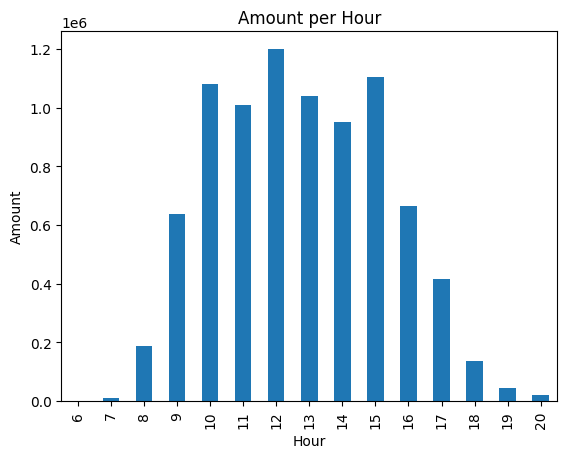

In [7]:
# Group by hour and calculate the sum of the total
result = sanitized.groupby(sanitized['Date'].dt.hour).agg({'Total': 'sum'}).reset_index()
result = result.sort_values('Date')
result.plot(kind='bar', x='Date', y='Total', legend=False)
plt.title('Amount per Hour')
plt.xlabel('Hour')
plt.ylabel('Amount')
plt.show()

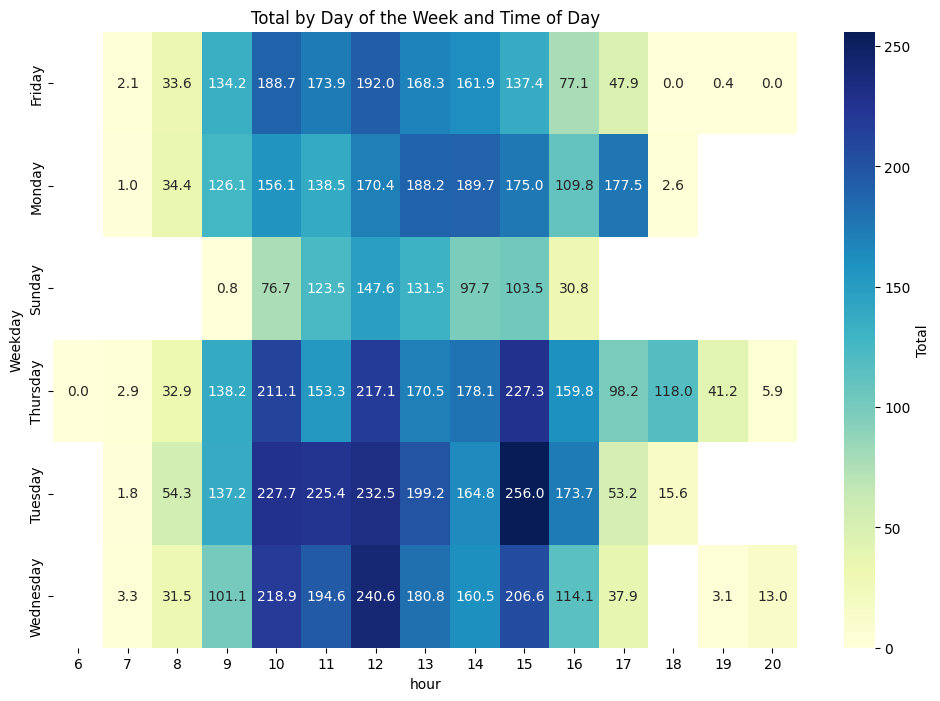

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
# Agrupa por día de la semana y hora del día y calcula la suma del total
sanitized['DayOfWeek'] = sanitized['Date'].dt.day_name()
sanitized['HourOfDay'] = sanitized['Date'].dt.hour

result = sanitized.groupby(['DayOfWeek', 'HourOfDay'])['Total'].sum().reset_index()
# Dividir los valores por 1000 y redondear a un decimal
result['Total'] = (result['Total'] / 1000).round(1)

# Crea un DataFrame pivot para facilitar la creación del heatmap
heatmap_data = result.pivot(index='DayOfWeek', columns='HourOfDay', values='Total')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".1f", cbar_kws={'label': 'Total'})
plt.title('Total by Day of the Week and Time of Day')
plt.xlabel('hour')
plt.ylabel('Weekday')

plt.show()

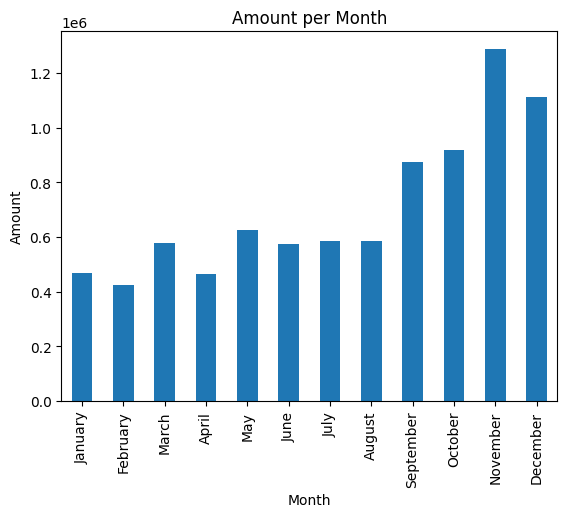

In [9]:
# Group by day of the week and calculate the sum of the total
result = sanitized.groupby(sanitized['Date'].dt.month_name()).agg({'Total': 'sum'}).reset_index()
# Defines the desired order of the days of the week
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December' ]
# # Convert 'InvoiceDate' column to category with desired order
result['Date'] = pandas.Categorical(result['Date'], categories=months, ordered=True)
# Sort the DataFrame by days of the week
result = result.sort_values('Date')
result.plot(kind='bar', x='Date', y='Total', legend=False)
plt.title('Amount per Month')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.show()

## Conclusiones

- Se puede observar que los días que mas se vende son los martes y jueves.
- Se puede observar que la mayoría de las ventas se realizan de las 9 a las 17.
- Se puede observar que las horas que mas se vende son las 12 y las 15.
- Se puede observar que los días que mas se vende son los jueves y los martes a las 12 y las 15.
- Se puede observar que las ventas aumentan a partir de septiembre y llegan a su pico en noviembre y diciembre.